In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# As the dataset is divided into folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating Dataset

In [2]:
w,h = 224,224
batch_size = 16

train_path = 'xray/train/'
test_path = 'xray/test/'
val_path = 'xray/val/'

train_img_gen = ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range=0.3
)

test_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

val_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [3]:
train_dataset.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

# View Images

(16, 224, 224, 3)


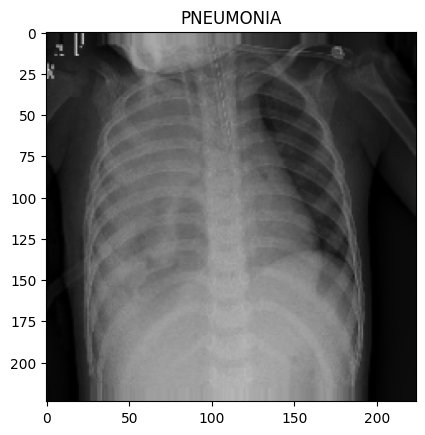

(16, 224, 224, 3)


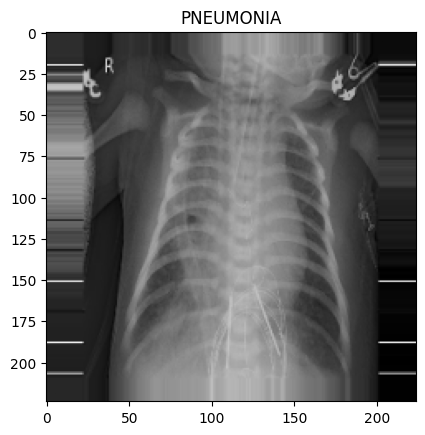

In [4]:
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

for _ in range(2):
    img, label = train_dataset.next()
    print(img.shape)
    plt.title(classes[np.argmax(label[0])])
    plt.imshow(img[0])
    plt.show()

In [5]:
train_dataset.image_shape

(224, 224, 3)

# CNN

In [6]:
# model = models.Sequential()

# # Convolutional layers
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten layer
# model.add(layers.Flatten())

# # Dense layers
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.2))  # dropout to avoid overfitting
# model.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model architecture
# model.summary()

# Deep CNN (DCNN)

In [7]:
# model = models.Sequential()
# 
# # Convolutional layers
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# 
# # Flatten layer
# model.add(layers.Flatten())
# 
# # Dense layers
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))  # dropout to avoid overfitting
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))  # dropout to avoid overfitting
# model.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem
# 
# # compile model
# optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
# model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# 
# # Print a summary of the model architecture
# model.summary()

# Alexnet Architecture

In [8]:
# from tensorflow.keras import models
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# 
# model = models.Sequential()
# 
# # Convolutional layers
# model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(w, h, 3)))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# model.add(Conv2D(384, (3, 3), activation='relu'))
# model.add(Conv2D(384, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# 
# # Flatten layer
# model.add(Flatten())
# 
# # Dense layers
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))
# 
# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
# model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# 
# # Print a summary of the model architecture
# model.summary()


# CNN + LSTM

In [4]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Reshape the output from the convolutional layers for LSTM
model.add(layers.Reshape((-1, 128)))

# LSTM layer
model.add(layers.LSTM(128, return_sequences=True))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

# ResNet101_v2

In [10]:
# resnetModel = models.Sequential()

# ResNet_101_V2 = tf.keras.applications.ResNet101V2(
#                 include_top = False,
#                 weights="imagenet",
#                 input_shape=(w,h,3),
#                 pooling='max',
#                 classes=4
#             )

# for layer in ResNet_101_V2.layers:
#     layer.trainable = False

# resnetModel.add(ResNet_101_V2)
# resnetModel.add(layers.Flatten())
# resnetModel.add(layers.Dense(512, activation='relu'))
# resnetModel.add(layers.Dense(128, activation='relu'))
# resnetModel.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# # Compile the model
# resnetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# resnetModel.summary()

# Mobile Net v2

In [11]:
# mobileModel = models.Sequential()

# MobileNetV2 = tf.keras.applications.MobileNetV2(
#                 include_top = False,
#                 weights="imagenet",
#                 input_shape=(w,h,3),
#                 pooling='max',
#                 classes=4
#             )

# for layer in MobileNetV2.layers:
#     layer.trainable = False

# mobileModel.add(MobileNetV2)
# mobileModel.add(layers.Flatten())
# mobileModel.add(layers.Dense(512, activation='relu'))
# mobileModel.add(layers.Dense(128, activation='relu'))
# mobileModel.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# # Compile the model
# mobileModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# mobileModel.summary()

# Training

In [6]:
steps_per_epoch = len(os.listdir(train_path))//2
val_steps_per_epoch = len(os.listdir(val_path))//2

tf.random.set_seed(42)
epoch = 35


# Save best model
weight_path = 'model/cnn_lstm'

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'min',
    monitor = 'loss',
    save_freq='epoch',
    verbose = 1
) 

In [13]:
history = model.fit(train_dataset, epochs=epoch, validation_data=val_dataset, callbacks=[model_checkpoint])

Epoch 1/35
396/396 [==============================] - ETA: 0s - loss: 0.7313 - accuracy: 0.7240
Epoch 1: loss improved from inf to 0.73133, saving model to model\cnn_lstm
396/396 [==============================] - 112s 268ms/step - loss: 0.7313 - accuracy: 0.7240 - val_loss: 0.7992 - val_accuracy: 0.6842
Epoch 2/35
396/396 [==============================] - ETA: 0s - loss: 0.4471 - accuracy: 0.8275
Epoch 2: loss improved from 0.73133 to 0.44708, saving model to model\cnn_lstm
396/396 [==============================] - 80s 200ms/step - loss: 0.4471 - accuracy: 0.8275 - val_loss: 0.5230 - val_accuracy: 0.7368
Epoch 3/35
396/396 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8669
Epoch 3: loss improved from 0.44708 to 0.35085, saving model to model\cnn_lstm
396/396 [==============================] - 80s 202ms/step - loss: 0.3508 - accuracy: 0.8669 - val_loss: 0.6188 - val_accuracy: 0.7632
Epoch 4/35
396/396 [==============================] - ETA: 0s - loss: 0.3143

In [14]:
# history = mobileModel.fit(train_dataset, epochs=epoch, validation_data=val_dataset, callbacks=[model_checkpoint])

In [15]:
# history = resnetModel.fit(train_dataset, epochs=epoch, validation_data=val_dataset, callbacks=[model_checkpoint])

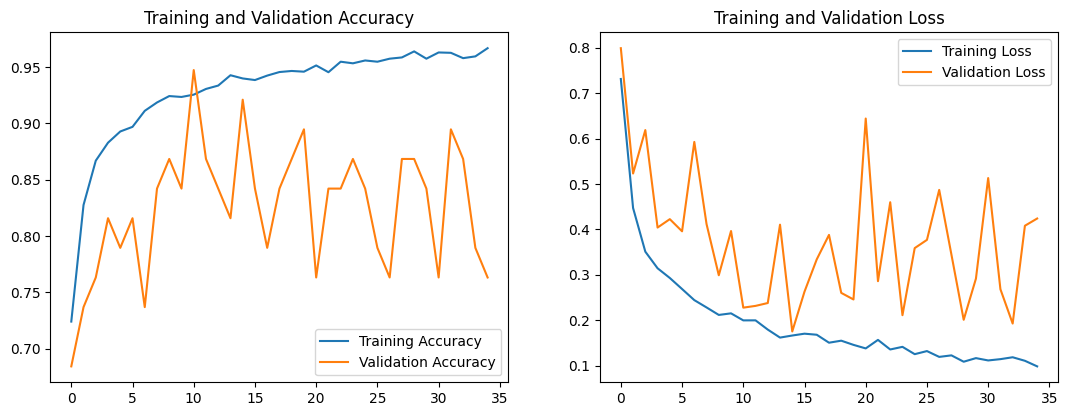

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
hist_df = pd.DataFrame(history.history)
hist_df.describe()

,loss,accuracy,val_loss,val_accuracy
count,35.000000,35.000000,35.000000,35.000000
mean,0.195517,0.929240,0.374275,0.825564
std,0.121197,0.047043,0.143431,0.056760
min,0.098126,0.723996,0.175078,0.684211
25%,0.123684,0.923886,0.261416,0.789474
50%,0.156471,0.945463,0.376848,0.842105
75%,0.213199,0.956687,0.423184,0.868421
max,0.731326,0.966804,0.799177,0.947368


# Predictions

In [7]:
labels = ['COVID-19','NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']


# load best weights to model
model.load_weights(weight_path)

# make predictions
predictions = model.predict(test_dataset)
# we have to get the position of the maximum value from each sample.
predicted_class = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_dataset.classes

49/49 [==============================] - 21s 229ms/step


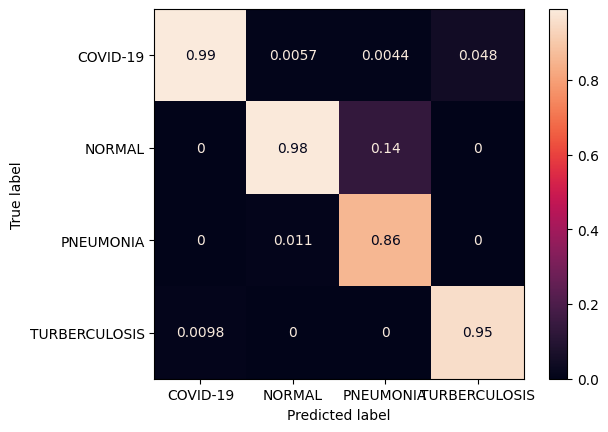

In [212]:
cm = confusion_matrix(true_labels, predicted_class, 
                      normalize='pred'
                      )
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='rocket')
plt.show()

In [9]:
# Print classification report

class_report = classification_report(true_labels, predicted_class, labels=[0, 1, 2, 3], target_names=labels)
print(class_report)

               precision    recall  f1-score   support

     COVID-19       0.99      0.95      0.97       106
       NORMAL       0.98      0.74      0.84       234
    PNEUMONIA       0.86      0.99      0.92       390
TURBERCULOSIS       0.95      0.98      0.96        41

     accuracy                           0.91       771
    macro avg       0.95      0.91      0.92       771
 weighted avg       0.92      0.91      0.91       771



In [39]:
test_dataset[0][0][0].shape

(224, 224, 3)

In [143]:
15*16

240

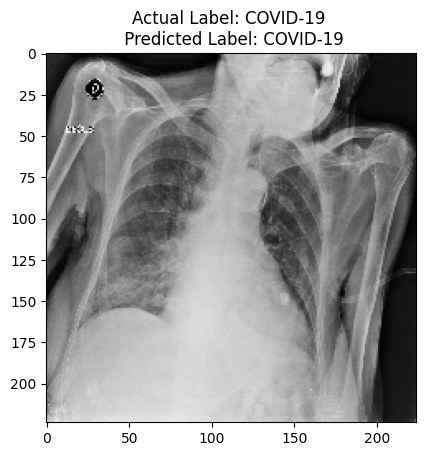

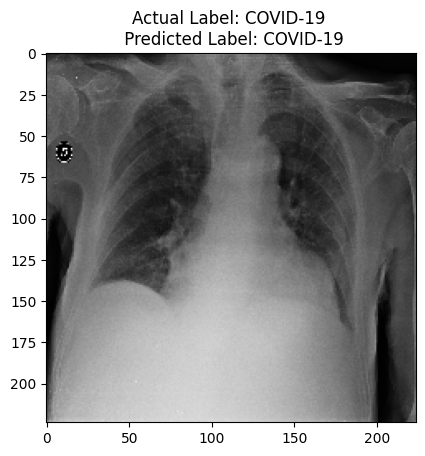

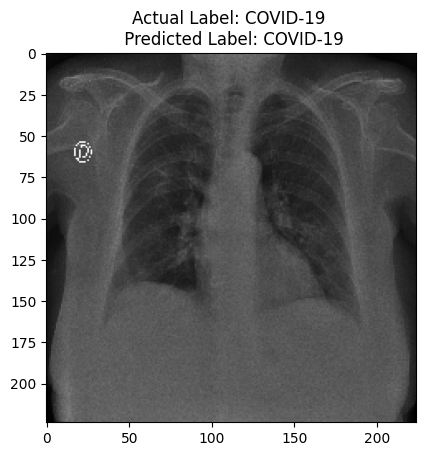

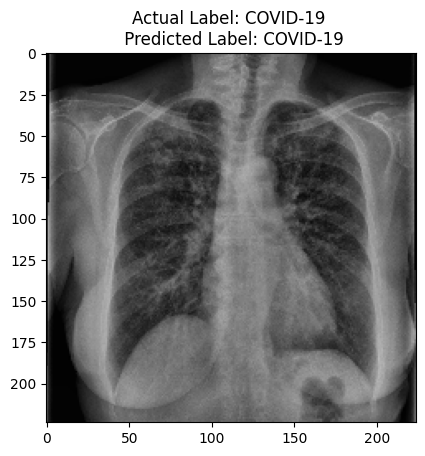

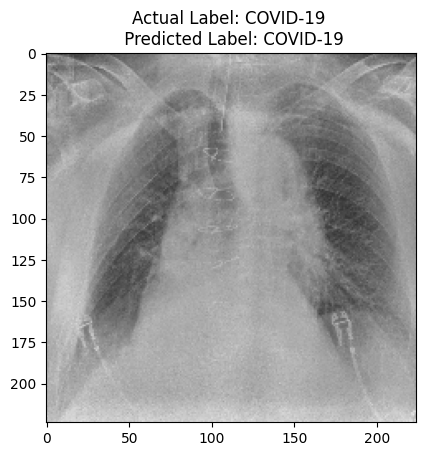

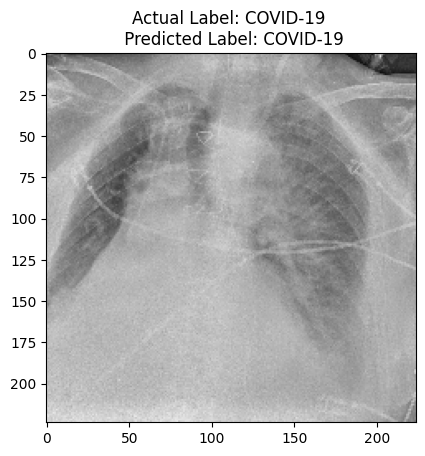

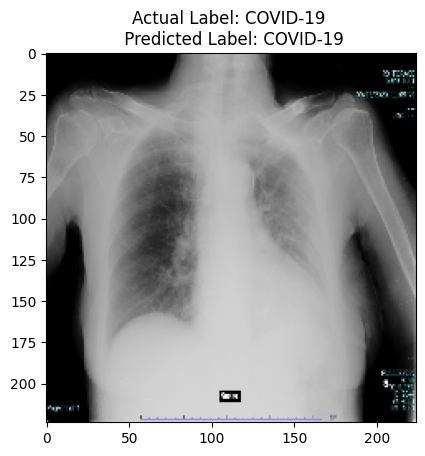

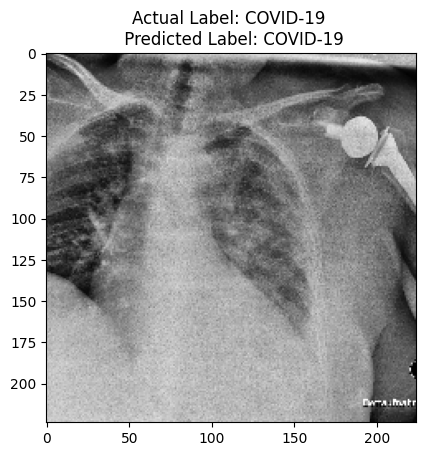

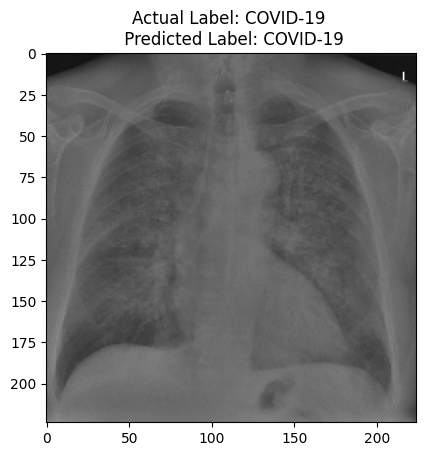

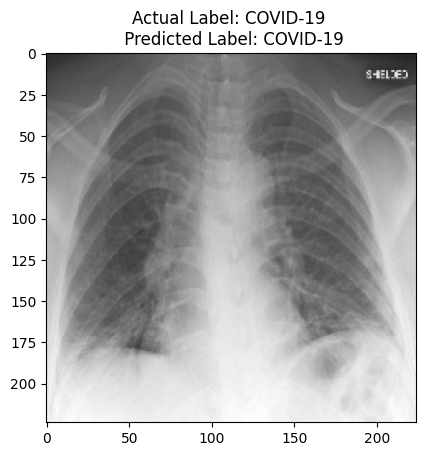

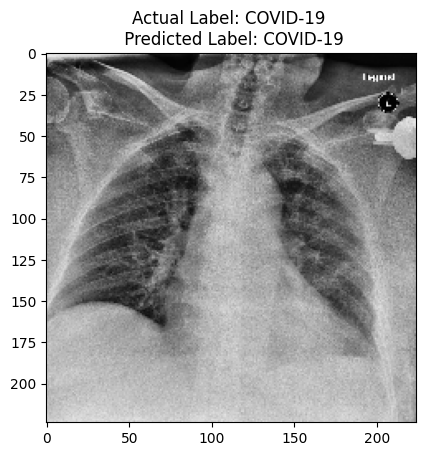

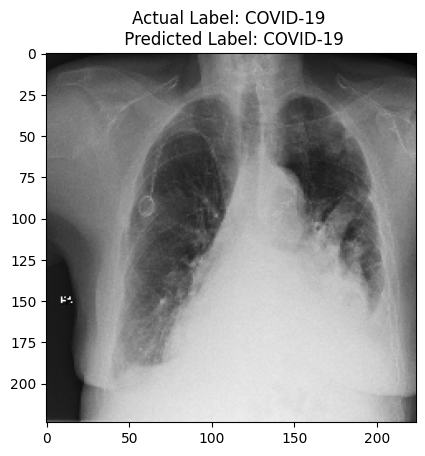

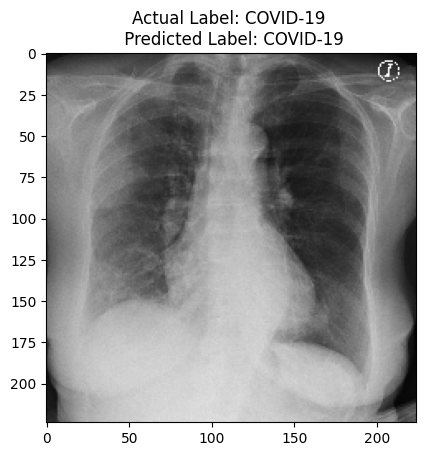

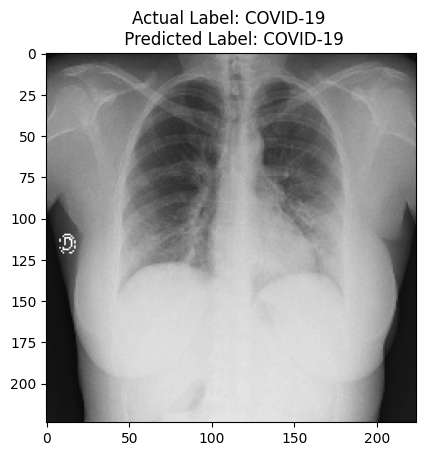

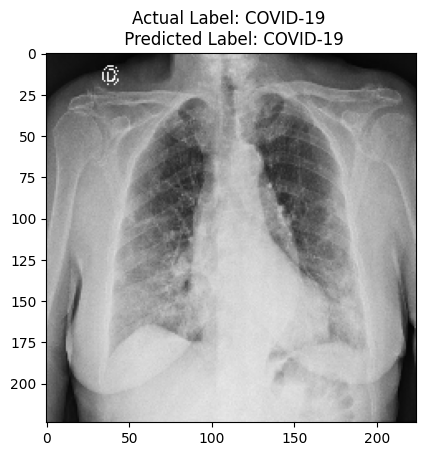

In [191]:
def singlePred(batch, im):
    actual_label = labels[np.argmax(test_dataset[batch][1][im])]
    pred_label = labels[np.argmax(predictions[batch*im])]


    plt.imshow(test_dataset[batch][0][im])
    plt.title(f"Actual Label: {actual_label} \n Predicted Label: {pred_label}")
    plt.show()
    
for i in range(15):
    singlePred(0,i)

# LIME

https://opensource.salesforce.com/OmniXAI/latest/tutorials/vision/lime.html

In [52]:
import lime
from lime import lime_image


explainer = lime_image.LimeImageExplainer()

In [195]:
explanation = explainer.explain_instance(test_dataset[0][0][3].astype('double'), 
                                         model.predict, 
                                         top_labels=4, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 55ms/step


In [54]:
from skimage.segmentation import mark_boundaries

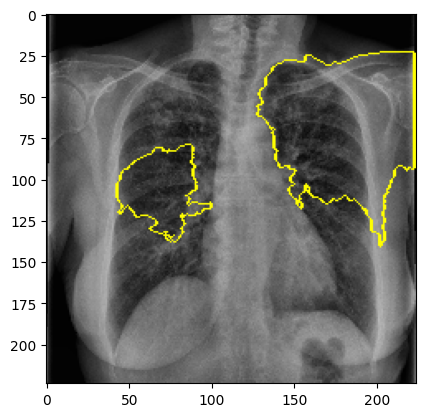

In [204]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, 
                                            num_features=4, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

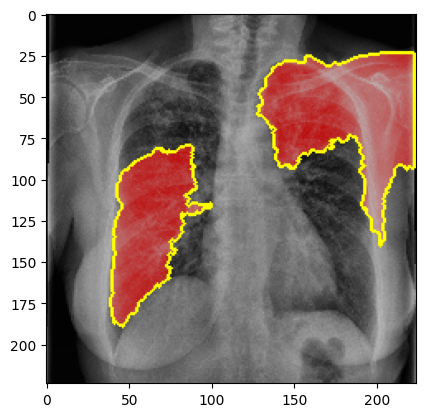

In [216]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], 
                                            positive_only=False, 
                                            num_features=4, 
                                            hide_rest=False, 
                                            min_weight=0.01
                                            )
plt.imshow(mark_boundaries(temp, mask))

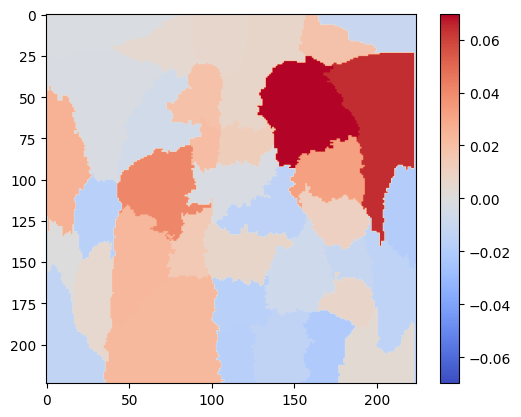

In [234]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'coolwarm', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

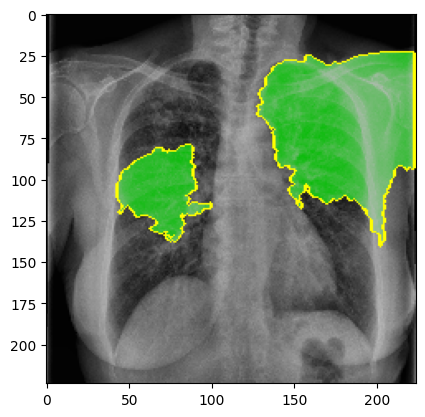

In [211]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=4, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))